# Groupe 1 Lyon


Ce dashboard propose une analyse approfondie de nos opérations de chaîne d'approvisionnement à travers plusieurs sources de données. L'objectif est d'identifier les indicateurs clés de performance (KPI) et de générer des insights exploitables pour optimiser la chaîne d'approvisionnement.

### Sources de Données (Concatener)

- Achats
- Commandes
- Expedition
- Produits


### ACHATS

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



data = pd.read_csv('Features/Export_fe_data/achats_merged_features.csv', sep=",")
data.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,cout_total,delai_deviation,retard_jours,mois_achat,on_time_delivery
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,19443.0,8,8,3,0
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,5540.5,0,0,6,1
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,Lecomte et Fils,Zurich,Suisse,0.84,10,10543.5,-2,0,1,1
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,60385.0,1,1,11,0
4,PO000005,2024-06-07,P00196,50,S025,256.05,13,Techer SA,Varsovie,Pologne,0.92,12,12802.5,1,1,6,0


#### Nous allons d'abord definir quelque KPI principaux pour ces data :

In [86]:
def calculate_kpis(data):
    kpis = {
        'Total dépenses': f"{data['cout_total'].sum():,.2f} €",
        'Délai moyen livraison': f"{data['délai_livraison_jours'].mean():.1f} jours",
        'Taux livraison à temps': f"{(data['on_time_delivery'].mean()*100):.1f}%",
        'Nb fournisseurs actifs': len(data['id_fournisseur'].unique())
    }
    return kpis

calculate_kpis(data)

{'Total dépenses': '155,307,061.35 €',
 'Délai moyen livraison': '8.0 jours',
 'Taux livraison à temps': '46.9%',
 'Nb fournisseurs actifs': 50}

In [87]:
# Configuration 
sns.set_theme(style="whitegrid")


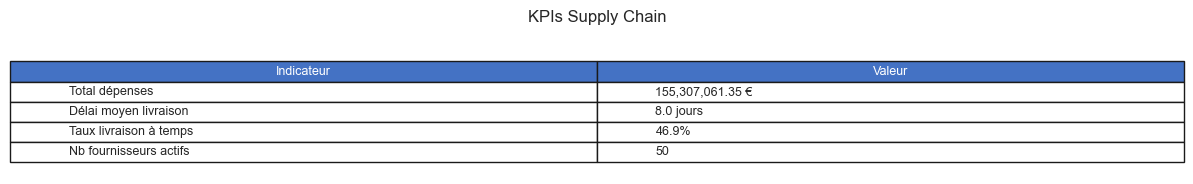

In [88]:
def display_kpis_styled(data):
    kpis = calculate_kpis(data)
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 2))
    ax.axis('tight')
    ax.axis('off')
    
    table_data = [[k, v] for k, v in kpis.items()]
    table = ax.table(cellText=table_data,
                    colLabels=['Indicateur', 'Valeur'],
                    loc='center',
                    cellLoc='left')
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    
    for j in range(2):
        table[(0, j)].set_facecolor('#4472C4')
        table[(0, j)].set_text_props(color='white')
    
    plt.title('KPIs Supply Chain', pad=20)
    return fig

# Affichage des visualisations
kpi_fig = display_kpis_styled(data)
plt.show()

C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\2000364305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pays_depenses.reset_index(),
C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\2000364305.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_suppliers.reset_index(),
C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\2000364305.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')


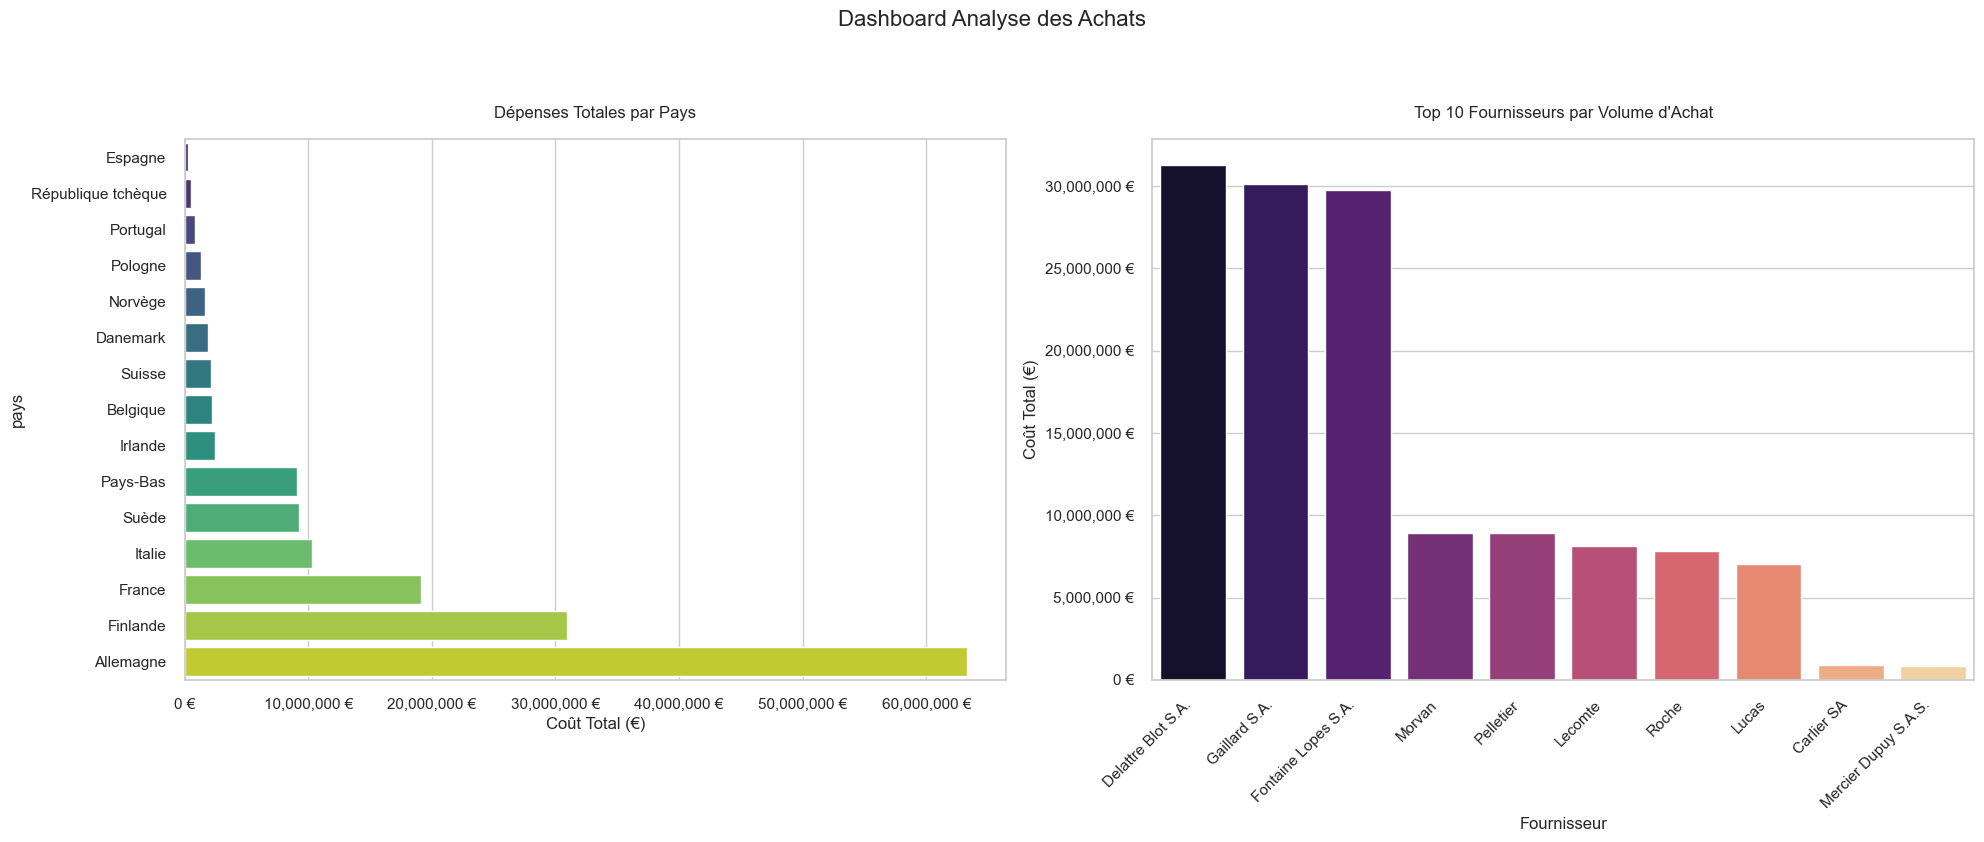

In [89]:
def create_dashboard_visualizations(data):
    # Create figure with 1x2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Dashboard Analyse des Achats', fontsize=16, y=1.05)

    # 1. Dépenses par pays
    pays_depenses = data.groupby('pays')['cout_total'].sum().sort_values(ascending=True)
    sns.barplot(data=pays_depenses.reset_index(), 
                y='pays', 
                x='cout_total',
                ax=axes[0],
                palette='viridis')
    axes[0].set_title('Dépenses Totales par Pays', pad=15)
    axes[0].set_xlabel('Coût Total (€)')
    
    # Format x-axis values with thousand separator
    axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f} €'))

    # 2. Top 10 fournisseurs
    top_suppliers = data.groupby('nom_fournisseur')['cout_total'].sum().nlargest(10)
    sns.barplot(data=top_suppliers.reset_index(), 
                x='nom_fournisseur', 
                y='cout_total',
                ax=axes[1],
                palette='magma')
    axes[1].set_title('Top 10 Fournisseurs par Volume d\'Achat', pad=15)
    axes[1].set_xlabel('Fournisseur')
    axes[1].set_ylabel('Coût Total (€)')
    
    # Rotation des labels sans le paramètre ha
    axes[1].tick_params(axis='x', rotation=45)
    # Ajustement de l'alignement des labels après rotation
    axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')
    
    # Format y-axis values with thousand separator
    axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f} €'))

    # Adjust layout
    plt.tight_layout()
    return fig

# Create and display the dashboard
dashboard_fig = create_dashboard_visualizations(data)
plt.show()

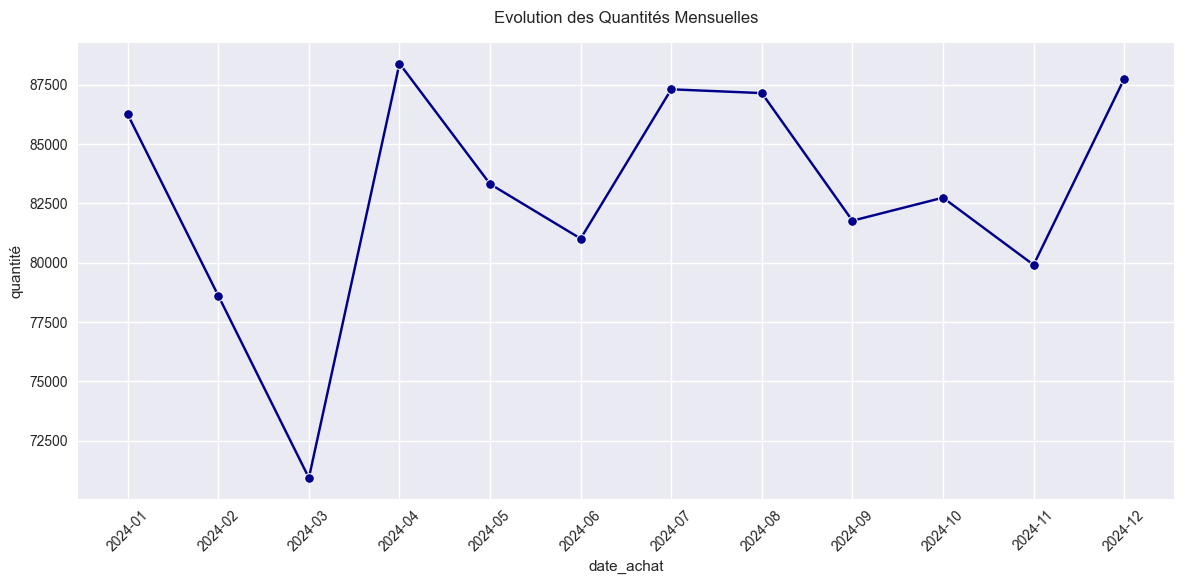

C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\3621557203.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,


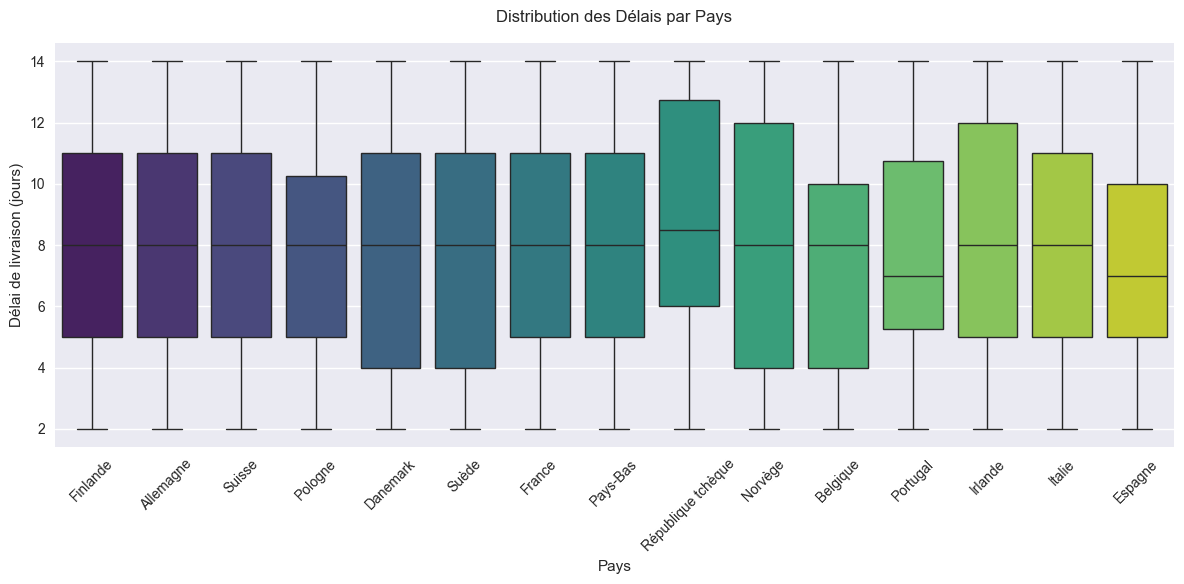

C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\3621557203.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_otd.values,


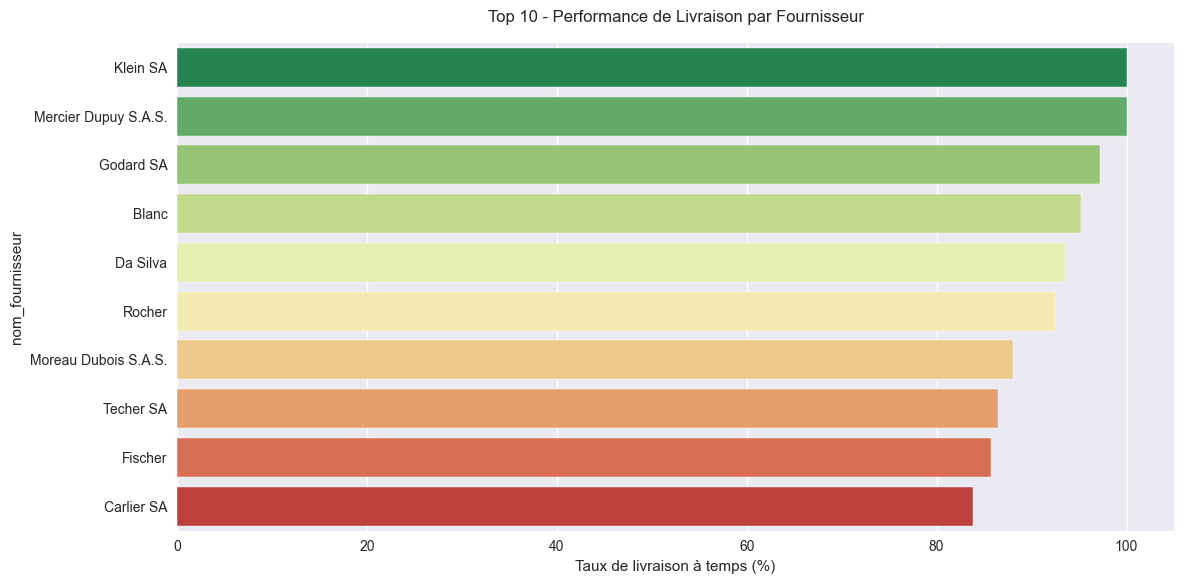

In [90]:
def create_individual_visualizations(data):
    plt.style.use('seaborn-v0_8')
    
    # 1. Evolution temporelle des quantités
    plt.figure(figsize=(12, 6))
    data['date_achat'] = pd.to_datetime(data['date_achat'])
    monthly_costs = data.groupby(data['date_achat'].dt.strftime('%Y-%m'))['quantité'].sum().reset_index()
    sns.lineplot(data=monthly_costs, 
                x='date_achat', 
                y='quantité',
                color='darkblue',
                marker='o')
    plt.title('Evolution des Quantités Mensuelles', pad=15)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 3. Distribution des délais par pays
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data,
                x='pays',
                y='délai_livraison_jours',
                palette='viridis')
    plt.title('Distribution des Délais par Pays', pad=15)
    plt.xticks(rotation=45)
    plt.xlabel('Pays')
    plt.ylabel('Délai de livraison (jours)')
    plt.tight_layout()
    plt.show()

    # 4. Performance de livraison par fournisseur (Top 10)
    plt.figure(figsize=(12, 6))
    on_time_perf = data.groupby('nom_fournisseur')['on_time_delivery'].mean() * 100
    top_10_otd = on_time_perf.nlargest(10)
    sns.barplot(x=top_10_otd.values,
                y=top_10_otd.index,
                palette='RdYlGn_r')
    plt.title('Top 10 - Performance de Livraison par Fournisseur', pad=15)
    plt.xlabel('Taux de livraison à temps (%)')
    plt.tight_layout()
    plt.show()

# Affichage des visualisations individuelles
create_individual_visualizations(data)



### Commandes

In [91]:
data2 = pd.read_csv('Features/Export_fe_data/commandes_merged_features.csv', sep=",")
data2.head()

,id_commande,date_commande,id_produit,quantité,entrepôt,statut,date_retour,motif,return_flag,order_month
0,O000001,2024-09-03,P00413,2,Marseille,Livré,NaN,NaN,0,9
1,O000002,2024-11-09,P00778,15,Lyon,Expédié,NaN,NaN,0,11
2,O000004,2024-11-03,P00535,8,Lyon,Livré,NaN,NaN,0,11
3,O000006,2024-01-24,P00898,3,Paris,Livré,NaN,NaN,0,1
4,O000007,2024-02-15,P00445,1,Lyon,Livré,NaN,NaN,0,2


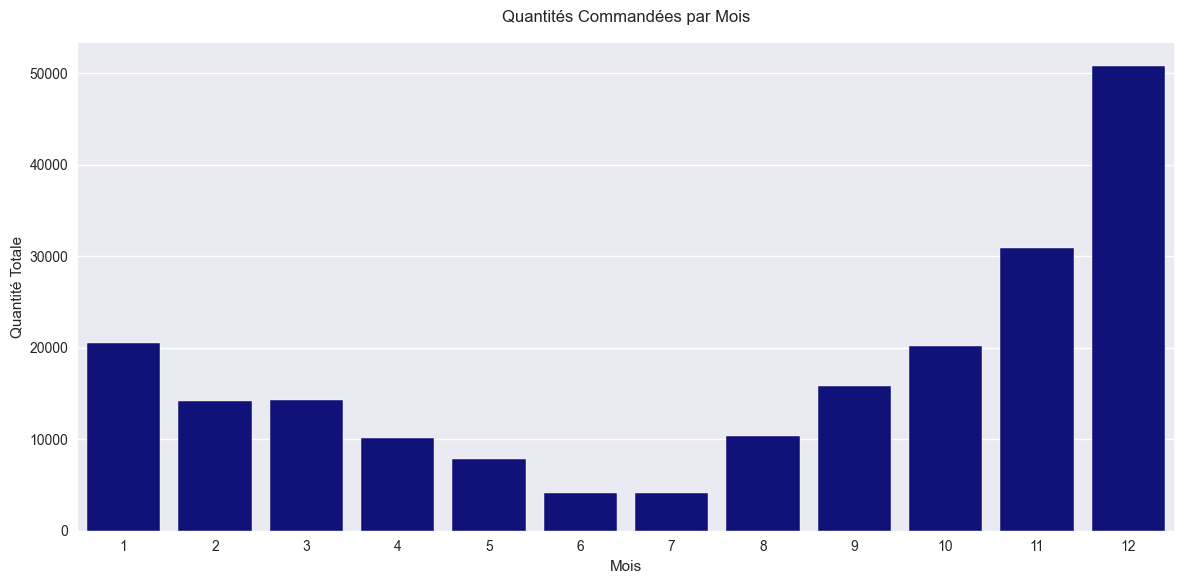

C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\3524885352.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data2,


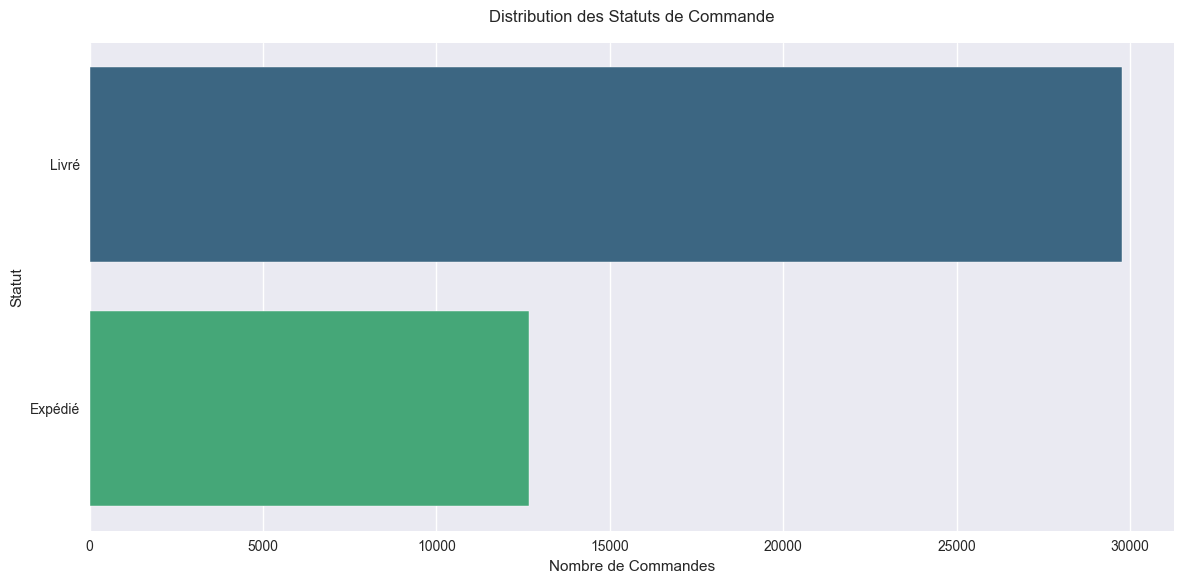

C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\3524885352.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate.index,


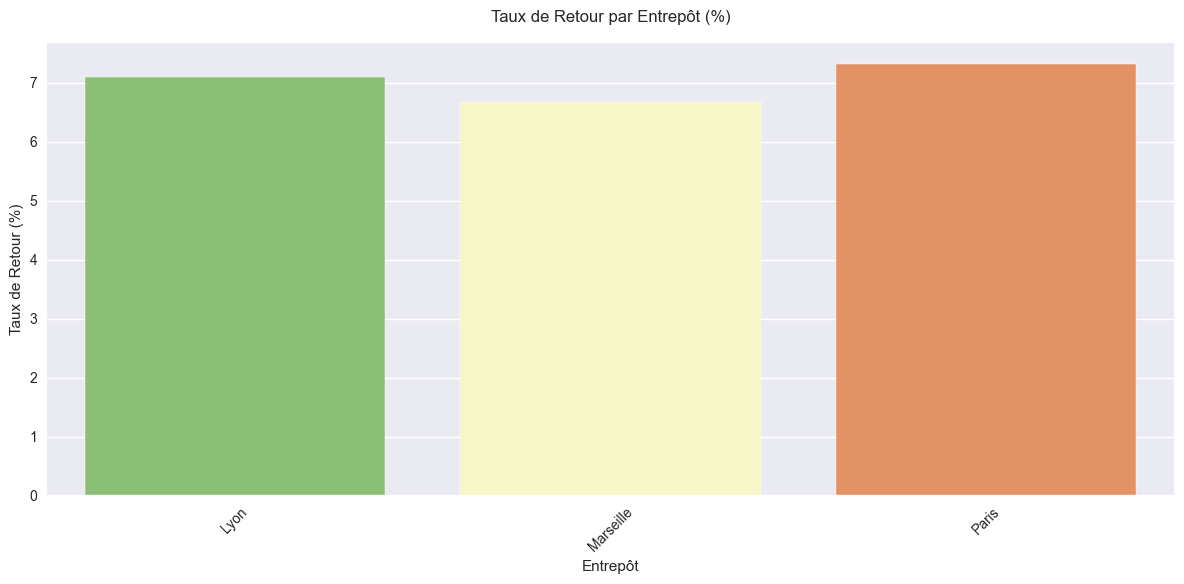


Statistiques des commandes:

Commandes par entrepôt:
entrepôt
Lyon         14186
Marseille    14021
Paris        14251
Name: id_commande, dtype: int64

Quantité moyenne par commande:
entrepôt
Lyon         4.779783
Marseille    4.807432
Paris        4.780156
Name: quantité, dtype: float64

Taux de retour global:
7.04%

Top 3 mois les plus actifs:
order_month
12    50774
11    30907
1     20517
Name: quantité, dtype: int64


In [92]:
def create_order_visualizations(data2):
    plt.style.use('seaborn-v0_8')
    
    # 1. Quantités commandées par mois
    plt.figure(figsize=(12, 6))
    monthly_orders = data2.groupby('order_month')['quantité'].sum().reset_index()
    sns.barplot(data=monthly_orders,
                x='order_month',
                y='quantité',
                color='darkblue')
    plt.title('Quantités Commandées par Mois', pad=15)
    plt.xlabel('Mois')
    plt.ylabel('Quantité Totale')
    plt.tight_layout()
    plt.show()

   

    # 3. Statut des commandes
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data2,
                  y='statut',
                  palette='viridis')
    plt.title('Distribution des Statuts de Commande', pad=15)
    plt.xlabel('Nombre de Commandes')
    plt.ylabel('Statut')
    plt.tight_layout()
    plt.show()

    # 4. Taux de retour par entrepôt
    plt.figure(figsize=(12, 6))
    return_rate = data2.groupby('entrepôt')['return_flag'].mean() * 100
    sns.barplot(x=return_rate.index,
                y=return_rate.values,
                palette='RdYlGn_r')
    plt.title('Taux de Retour par Entrepôt (%)', pad=15)
    plt.xlabel('Entrepôt')
    plt.ylabel('Taux de Retour (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Statistiques supplémentaires
def display_order_stats(data2):
    stats = {
        'Commandes par entrepôt': data2.groupby('entrepôt')['id_commande'].count(),
        'Quantité moyenne par commande': data2.groupby('entrepôt')['quantité'].mean(),
        'Taux de retour global': f"{(data2['return_flag'].mean() * 100):.2f}%",
        'Top 3 mois les plus actifs': data2.groupby('order_month')['quantité'].sum().nlargest(3)
    }
    return stats

# Exécution
create_order_visualizations(data2)
stats = display_order_stats(data2)
print("\nStatistiques des commandes:")
for name, stat in stats.items():
    print(f"\n{name}:")
    print(stat)

### Expedition

In [94]:
data2 = pd.read_csv('Features/Export_fe_data/expeditions_merged_features.csv', sep=",")
data2.head()

,id_expedition,id_commande,id_produit,quantité,entrepôt,date_expedition,date_livraison,transporteur,coût_transport,délai_livraison,coût_trsp_par_unité,avg_delay_transporteur,on_time_delivery,mois_expedition
0,SHP000001,O000001,P00413,2,Marseille,2024-09-09,2024-09-15,UPS,11.62,6,5.810000,4.984788,0,9
1,SHP000002,O000002,P00778,15,Lyon,2024-11-16,2024-11-23,Chronopost,13.61,7,0.907333,6.497407,0,11
2,SHP000003,O000004,P00535,8,Lyon,2024-11-06,2024-11-09,FedEx,19.32,3,2.415000,3.503904,1,11
3,SHP000004,O000006,P00898,3,Paris,2024-01-26,2024-01-28,DHL,14.79,2,4.930000,2.000000,1,1
4,SHP000005,O000007,P00445,1,Lyon,2024-02-18,2024-02-21,FedEx,13.56,3,13.560000,3.503904,1,2


C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\2998128506.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2.groupby('entrepôt')['id_expedition'].count().reset_index(),
C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\2998128506.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data2,
C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\2998128506.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data2.groupby('transporteur')['coût_trsp_par_unité'].mean().reset_index(),



KPIs des Expéditions:
Total expéditions: 42404
Délai moyen livraison: 3.7 jours
Taux livraison à temps: 59.2%
Coût transport moyen: 14.65 €


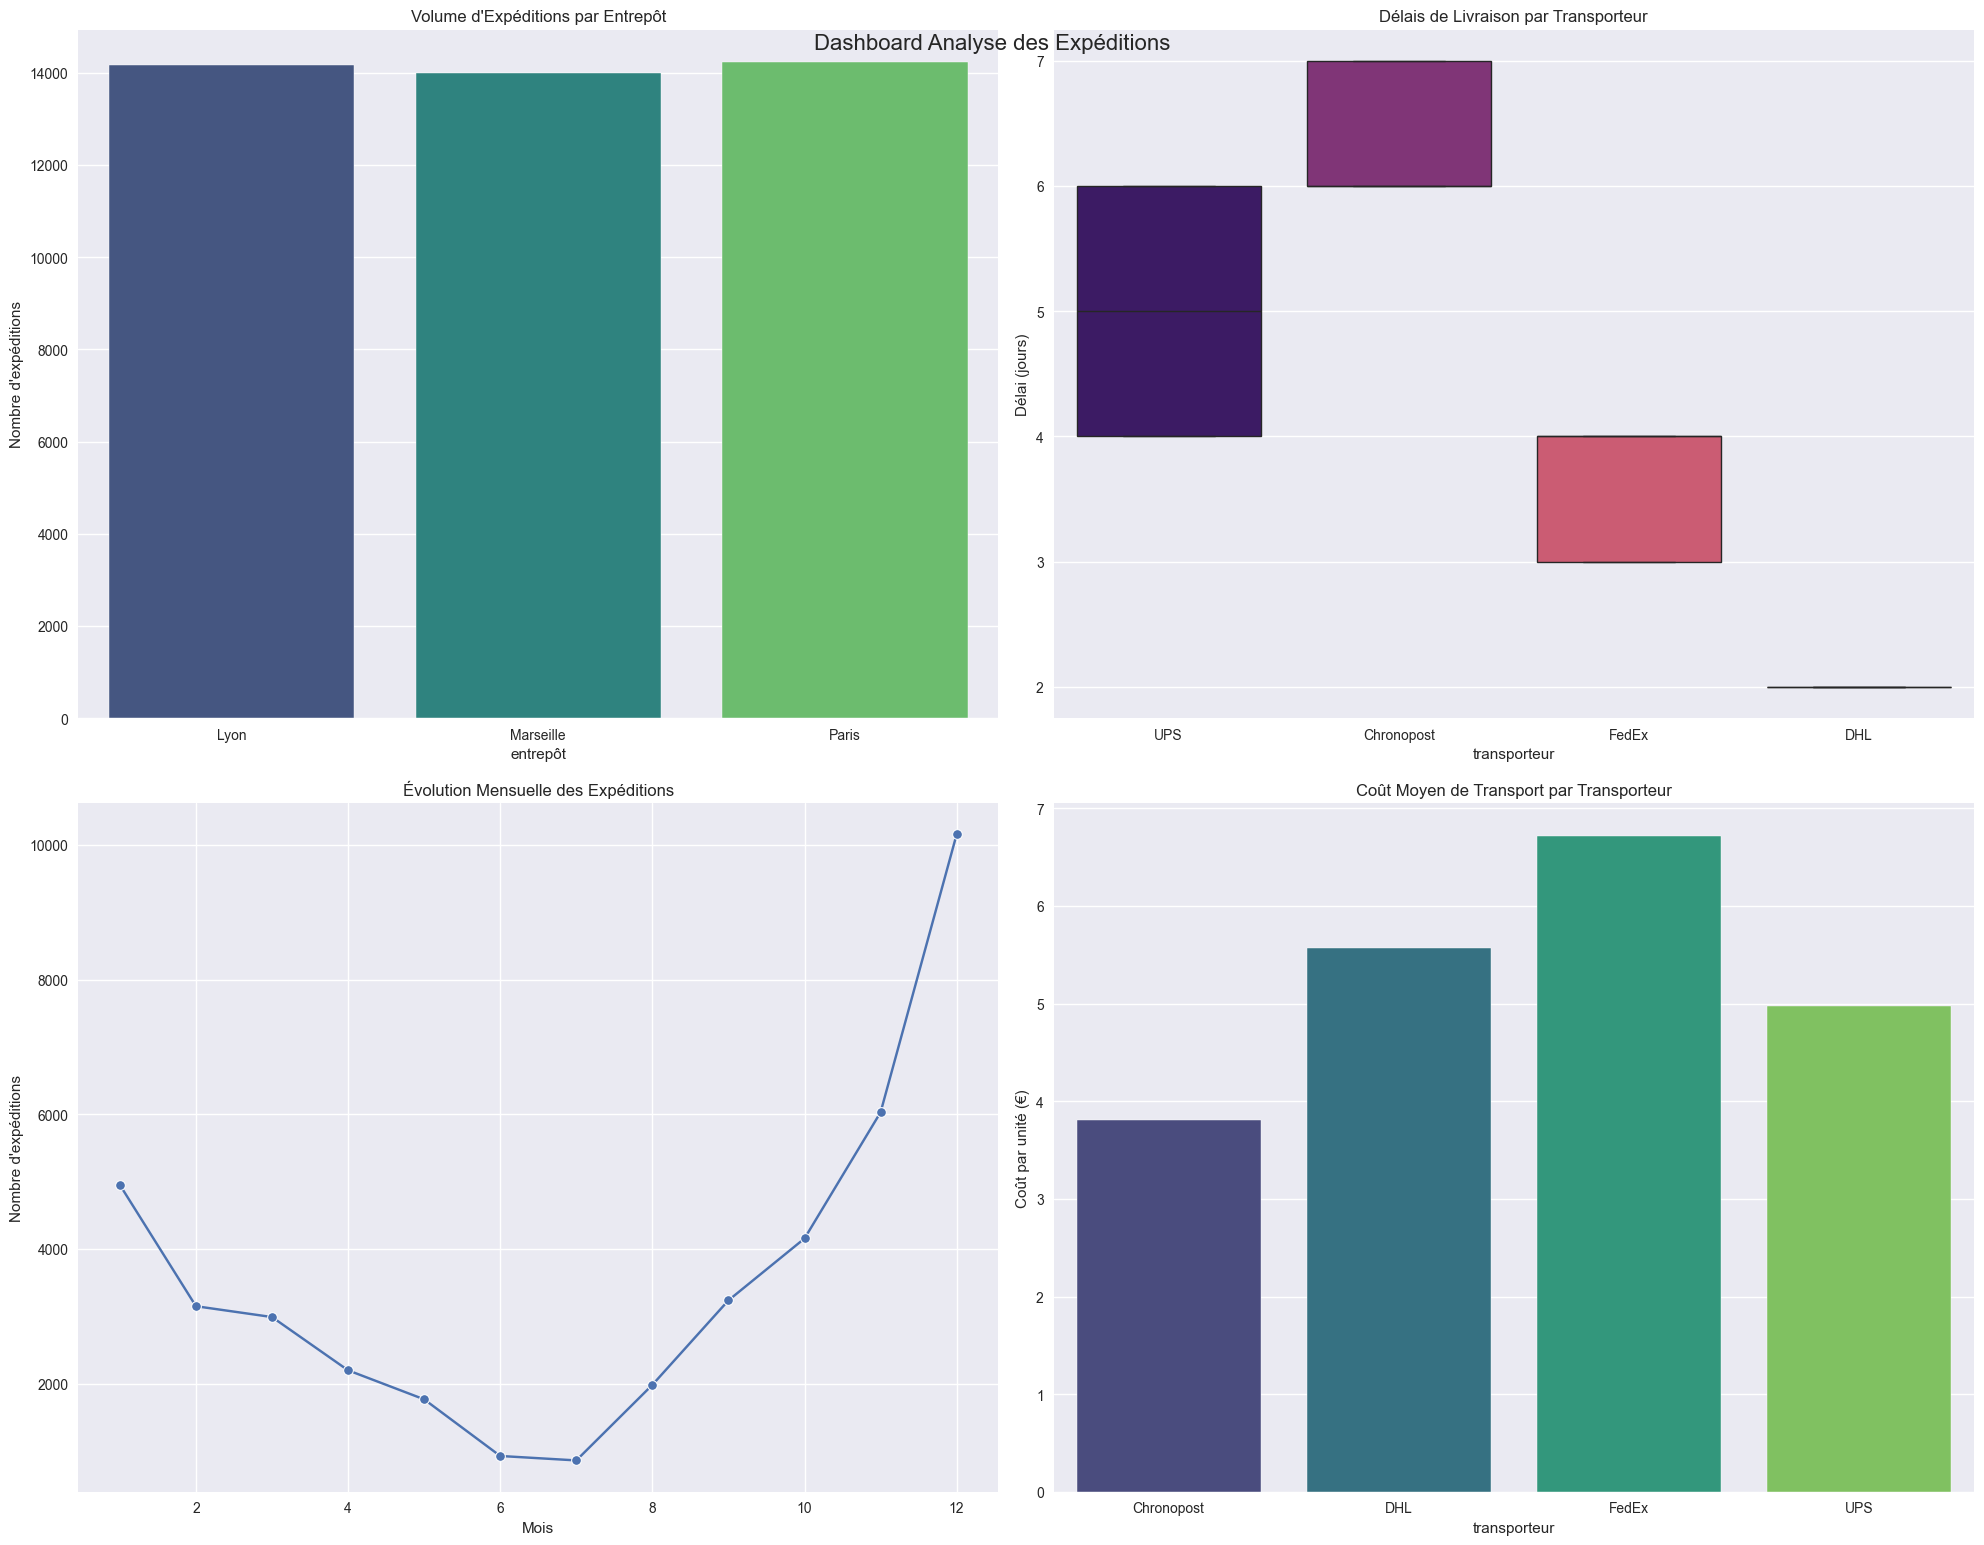

In [96]:
# Configuration des KPIs pour les expéditions
def calculate_expedition_kpis(data2):
    kpis = {
        'Total expéditions': len(data2),
        'Délai moyen livraison': f"{data2['délai_livraison'].mean():.1f} jours",
        'Taux livraison à temps': f"{(data2['on_time_delivery'].mean()*100):.1f}%",
        'Coût transport moyen': f"{data2['coût_transport'].mean():.2f} €"
    }
    return kpis

# Création du dashboard pour les expéditions
def create_expedition_dashboard(data2):
    # Configuration du style
    plt.style.use('seaborn-v0_8')
    
    # Création de la figure principale avec 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Dashboard Analyse des Expéditions', fontsize=16, y=0.95)
    
    # 1. Volume d'expéditions par entrepôt
    sns.barplot(data=data2.groupby('entrepôt')['id_expedition'].count().reset_index(),
                x='entrepôt',
                y='id_expedition',
                ax=axes[0,0],
                palette='viridis')
    axes[0,0].set_title('Volume d\'Expéditions par Entrepôt')
    axes[0,0].set_ylabel('Nombre d\'expéditions')
    
    # 2. Performance des transporteurs (délai moyen)
    sns.boxplot(data=data2,
                x='transporteur',
                y='délai_livraison',
                ax=axes[0,1],
                palette='magma')
    axes[0,1].set_title('Délais de Livraison par Transporteur')
    axes[0,1].set_ylabel('Délai (jours)')
    
    # 3. Évolution mensuelle des expéditions
    monthly_shipments = data2.groupby('mois_expedition')['id_expedition'].count().reset_index()
    sns.lineplot(data=monthly_shipments,
                x='mois_expedition',
                y='id_expedition',
                ax=axes[1,0],
                marker='o')
    axes[1,0].set_title('Évolution Mensuelle des Expéditions')
    axes[1,0].set_xlabel('Mois')
    axes[1,0].set_ylabel('Nombre d\'expéditions')
    
    # 4. Coût moyen de transport par transporteur
    sns.barplot(data=data2.groupby('transporteur')['coût_trsp_par_unité'].mean().reset_index(),
                x='transporteur',
                y='coût_trsp_par_unité',
                ax=axes[1,1],
                palette='viridis')
    axes[1,1].set_title('Coût Moyen de Transport par Transporteur')
    axes[1,1].set_ylabel('Coût par unité (€)')
    
    # Ajustement du layout
    plt.tight_layout()
    
    # Affichage des KPIs
    kpis = calculate_expedition_kpis(data2)
    print("\nKPIs des Expéditions:")
    for k, v in kpis.items():
        print(f"{k}: {v}")
    
    return fig

# Création et affichage du dashboard
expedition_dashboard = create_expedition_dashboard(data2)
plt.show()